In [3]:
import json
import os
from os import getcwd

import liwc
import numpy as np
import pandas as pd
import spacy
from utils.corpus_manager import DialogueCorpusManager
from utils.dialogue_parser import DialogueParser

from pipelinelib.pipeline import Pipeline
from pipelinelib.text_body import TextBody
from sigmund.classification import qda
from sigmund.features import agreement_score as fagree
from sigmund.features import flesch_reading_ease as fflesch
from sigmund.features import talk_turn as ftalkturn
from sigmund.features import words as fwords
from sigmund.preprocessing import syllables as psyllables
from sigmund.preprocessing import words as pwords

if __name__ == "__main__":
    nlp = spacy.load("de_core_news_sm", disable=["ner", "parser"])

    path2file0 = r"/home/rise/Schreibtisch/Sigmund/Paardialog_text/Paar 27_T1_IM_FW.docx"
    path2file1 = r"/home/rise/Schreibtisch/Sigmund/Paardialog_text/Paar 29_T1_IM_FW.docx"
    path2file2 = r"/home/rise/Schreibtisch/Sigmund/Paardialog_text/Paar 47_T1_IM_FW.docx"
    path2file3 = r"/home/rise/Schreibtisch/Sigmund/Paardialog_text/Paar 58_T1_IM_FW.docx"
    path2file4 = r"/home/rise/Schreibtisch/Sigmund/Paardialog_text/Paar 60_T1_IM_FW.docx"
    path2file5 = r"/home/rise/Schreibtisch/Sigmund/Paardialog_text/Paar 81_T1_IM_FW.docx"
    path2file6 = r"/home/rise/Schreibtisch/Sigmund/Paardialog_text/Paar 87_T1_IM_FW.docx"
    path2file7 = r"/home/rise/Schreibtisch/Sigmund/Paardialog_text/Paar 105_T1_IM_FW.docx"
    path2file8 = r"/home/rise/Schreibtisch/Sigmund/Paardialog_text/Paar 138_T1_IM_FW.docx"
    path2file9 = r"/home/rise/Schreibtisch/Sigmund/Paardialog_text/Paar 182_T1_IM_FW.docx"
    liwc_dict_path = r"/home/rise/Schreibtisch/Sigmund_git/sigmund/data/German_LIWC2001_Dictionary.dic"

    # parse, category_names = liwc.load_token_parser(liwc_dict_path)

    # dialogue0 = DialogueParser(file=path2file0, nlp=nlp)
    # dialogue1 = DialogueParser(file=path2file1, nlp=nlp)
    # dialogue2 = DialogueParser(file=path2file2, nlp=nlp)
    # dialogue3 = DialogueParser(file=path2file3, nlp=nlp)
    # dialogue4 = DialogueParser(file=path2file4, nlp=nlp)
    # dialogue5 = DialogueParser(file=path2file5, nlp=nlp)
    # dialogue6 = DialogueParser(file=path2file6, nlp=nlp)
    # dialogue7 = DialogueParser(file=path2file7, nlp=nlp)
    # dialogue8 = DialogueParser(file=path2file8, nlp=nlp)
    # dialogue9 = DialogueParser(file=path2file9, nlp=nlp)

    with open(os.path.join(os.getcwd(), '../config.json'), 'r') as configfile:
        config = json.load(configfile)

    parsers_depr = []
    parsers_non_depr = []
    for transcript in config['transcripts']:
        if transcript['depression'] == True:
            parsers_depr.append(
                DialogueParser(
                    file=os.path.join(
                        config['path_to_transcripts'],
                        transcript['transcript_id']),
                    nlp=nlp))
        if transcript['depression'] == False:
            parsers_non_depr.append(
                DialogueParser(
                    file=os.path.join(
                        config['path_to_transcripts'],
                        transcript['transcript_id']),
                    nlp=nlp))

    # preprocessed = [parser.get_paragraphs().apply(preprocess, axis=1)
    #                for parser in parsers]
    # all_frames = pd.concat(preprocessed)
    # print(all_frames)

    pipeline = Pipeline(model=nlp, empty_pipeline=True) \
        .add_component(fagree.AgreementScoreExtractor(liwc_dict_path))\
        .add_component(ftalkturn.TalkTurnExtractor())\
        # .add_component(psyllables.SyllableExtractor()) \
    # .add_component(pwords.Tokenizer()) \
    # .add_component(pwords.StemmedAndLemmatized()) \

    preprocessed_depr     = [pipeline.execute(parser, TextBody.ALL_PARAGRAPHS)
                             for parser in parsers_depr]
    preprocessed_non_depr = [pipeline.execute(parser, TextBody.ALL_PARAGRAPHS)
                             for parser in parsers_non_depr]
    #print(preprocessed[0][0]._.talkturn)
    #print(preprocessed[1][0]._.talkturn)
    #print(preprocessed[2][0]._.talkturn)
    #print(preprocessed[3][0]._.talkturn)
    #print(preprocessed[4][0]._.talkturn)
    #print(preprocessed[5][0]._.talkturn)
    #print(preprocessed[6][0]._.talkturn)
    #print(preprocessed[7][0]._.talkturn)
    #print(preprocessed[8][0]._.talkturn)
    #print(preprocessed[9][0]._.talkturn)

    #print(preprocessed[7])

    for doc in preprocessed_depr:
        print('TT',doc[0]._.talkturn, 'AS',doc[0]._.agreementscore)
    for doc in preprocessed_non_depr:
        print('TT',doc[0]._.talkturn, 'AS',doc[0]._.agreementscore)
        
    #all_frames = pd.concat(preprocessed[:][0])
    # print(all_frames)

    # tmp = pipeline.execute(dialogue, TextBody.ALL_PARAGRAPHS)

    # print(tmp)
    # print(tmp[0]._.talkturn)
    # print(tmp[0]._.agreementscore)


{'A': 'M', 'B': 'W'}
{'A': 'M', 'B': 'W'}
{'A': 'M', 'B': 'W'}
{'A': 'W', 'B': 'M'}
{'A': 'W', 'B': 'M'}
{'A': 'W', 'B': 'M'}
{'A': 'M', 'B': 'W'}
{'A': 'M', 'B': 'W'}
{'A': 'W', 'B': 'M'}
{'A': 'W', 'B': 'M'}
=== Starting pipeline with ['AgreementScoreExtractor', 'TalkTurnExtractor'] ===
Executing AgreementScoreExtractor
TEST
0 10 Negate ['ehrlichkeit', 'heißt', 'dass', 'wir', 'nicht']
0 16 Discrep ['ja', 'aber', 'ja', 'loben', 'ja']
0 16 Excl ['ja', 'aber', 'ja', 'loben', 'ja']
0 18 Discrep ['zum', 'beispiel', 'wenn', 'du', 'mir']
0 20 Negate ['das', 'würde', 'ich', 'natürlich', 'nicht']
0 22 Discrep ['das', 'macht', 'mich', 'an', 'wenn']
1 6 Discrep ['wenn', 'ich', 'mit', 'dir', 'glücklich']
1 11 Discrep ['ja', 'und', 'wenn', 'wir', 'fort']
1 11 Excl ['ja', 'und', 'wenn', 'wir', 'fort']
1 13 Discrep ['ja', 'ist', 'doch', 'schön', 'wenn']
1 13 Excl ['ja', 'ist', 'doch', 'schön', 'wenn']
1 18 Negate ['die', 'momente', 'nicht', 'die', 'länge']
1 21 Discrep ['also', 'wenn', 'du', 'lieb'

=== Finished pipeline execution ===
=== Starting pipeline with ['AgreementScoreExtractor', 'TalkTurnExtractor'] ===
Executing AgreementScoreExtractor
TEST
0 6 Negate ['das', 'auch', 'nicht', 'so', 'in']
0 9 Negate ['ne']
0 10 Negate ['ne']
0 19 Negate ['ja', 'ne', 'hab', 'gar', 'kein']
1 1 Excl ['da', 'weiß', 'ich', 'jetzt', 'gar']
1 4 Discrep ['es', 'soll', 'ja', 'was', 'positives']
1 6 Negate ['nein', 'nein', 'das', 'sind', 'bloß']
1 7 Discrep ['willst', 'du', 'noch', 'ein', 'bisschen']
1 8 Negate ['ne']
1 18 Negate ['da', 'ist', 'jetzt', 'kein', 'problem']
1 18 Excl ['da', 'ist', 'jetzt', 'kein', 'problem']
1 20 Discrep ['aber', 'es', 'soll', 'was', 'positives']
1 20 Excl ['aber', 'es', 'soll', 'was', 'positives']
1 21 Excl ['ja', 'ja', 'doch', 'muss', 'ich']
Executing TalkTurnExtractor
=== Finished pipeline execution ===
=== Starting pipeline with ['AgreementScoreExtractor', 'TalkTurnExtractor'] ===
Executing AgreementScoreExtractor
TEST
0 0 Discrep ['soll', 'ich', 'anfangen', 'ich

In [7]:
#for doc in preprocessed_depr:
#        print(doc.SPEAKER)

In [2]:
tt_depr = []
as_depr = []
as_non_depr = []
tt_non_depr = []

for doc in preprocessed_depr:
    tt_depr.append(doc[0]._.talkturn)
    as_depr.append(doc[0]._.agreementscore)
for doc in preprocessed_non_depr:
    tt_non_depr.append(doc[0]._.talkturn)
    as_non_depr.append(doc[0]._.agreementscore)

    
print(tt_depr)
print(tt_non_depr)
print(as_depr)
print(as_non_depr)


[0.5, 0.43, 0.62, 0.46, 0.46]
[0.37, 0.58, 0.57, 0.63, 0.58]
[0.79, 0.75, 0.64, 0.77, 0.71]
[0.73, 0.85, 0.81, 0.71, 0.5700000000000001]


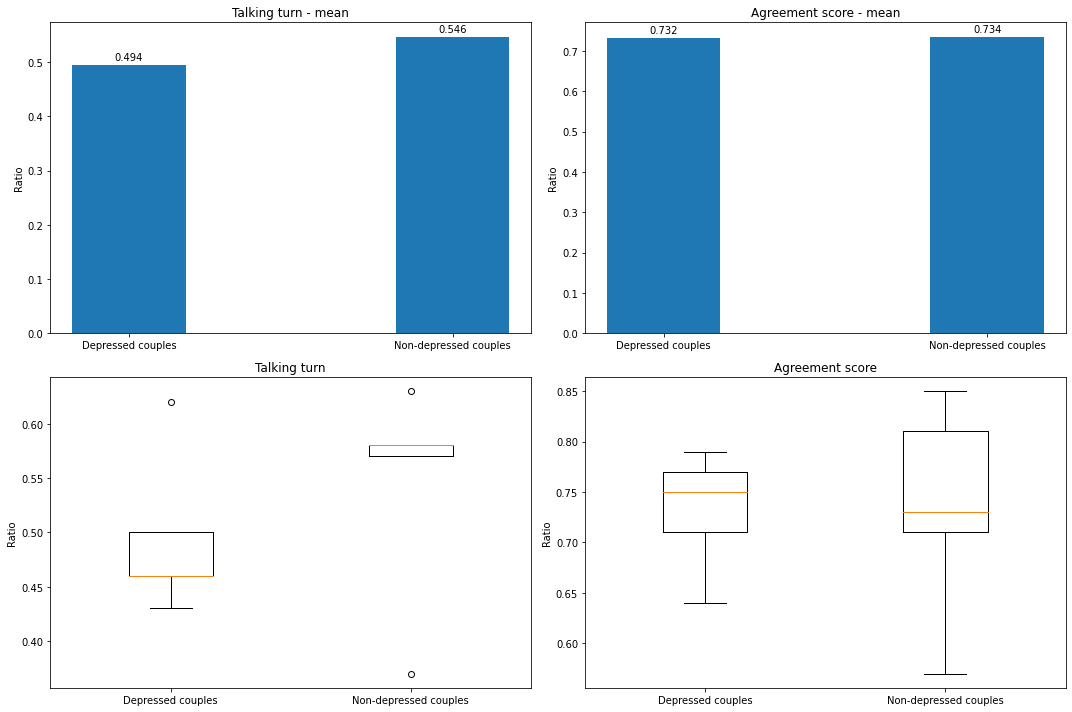

In [4]:
from statistics import mean 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2, figsize=(15,10))

labels = ['Depressed couples', 'Non-depressed couples']
tt_means = [round(mean(tt_depr),3),round(mean(tt_non_depr),3)]
as_means = [round(mean(as_depr),3),round(mean(as_non_depr),3)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

rects1 = ax[0,0].bar(x - width/2 + 0.175, tt_means, width, label='Ratio')
rects2 = ax[0,1].bar(x - width/2 + 0.175, as_means, width, label='Ratio')
rects3 = ax[1,0].boxplot( [tt_depr, tt_non_depr], widths = width)#,showfliers=False)
rects4 = ax[1,1].boxplot( [as_depr, as_non_depr], widths = width )

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0,0].set_ylabel('Ratio')
ax[0,0].set_title('Talking turn - mean')
ax[0,0].set_xticks(x)
ax[0,0].set_xticklabels(labels)

ax[0,1].set_ylabel('Ratio')
ax[0,1].set_title('Agreement score - mean')
ax[0,1].set_xticks(x)
ax[0,1].set_xticklabels(labels)

ax[1,0].set_ylabel('Ratio')
ax[1,0].set_title('Talking turn')
ax[1,0].set_xticks(x+1)
ax[1,0].set_xticklabels(labels)

ax[1,1].set_ylabel('Ratio')
ax[1,1].set_title('Agreement score')
ax[1,1].set_xticks(x+1)
ax[1,1].set_xticklabels(labels)
def autolabel(rects,x,y):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax[x,y].annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1,0,0)
autolabel(rects2,0,1)
#autolabel(rects3,1,0)
#autolabel(rects4,1,1)
fig.tight_layout()
plt.show()
